In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
feature_vectors = pd.read_csv("39-features-wambiana.csv")
labels_true = feature_vectors["class"]
feature_vectors = feature_vectors.drop(columns=["class"])
feature_vectors = feature_vectors.iloc[:, 0:13].values

In [2]:
model = TSNE(n_components=2, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0).fit_transform(feature_vectors)

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2237 samples in 0.003s...
[t-SNE] Computed neighbors for 2237 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2237
[t-SNE] Computed conditional probabilities for sample 2000 / 2237
[t-SNE] Computed conditional probabilities for sample 2237 / 2237
[t-SNE] Mean sigma: 0.053455
[t-SNE] Computed conditional probabilities in 0.049s
[t-SNE] Iteration 50: error = 70.0253677, gradient norm = 0.0777753 (50 iterations in 0.302s)
[t-SNE] Iteration 100: error = 61.7203979, gradient norm = 0.0091494 (50 iterations in 0.200s)
[t-SNE] Iteration 150: error = 61.1422195, gradient norm = 0.0069900 (50 iterations in 0.190s)
[t-SNE] Iteration 200: error = 61.0620041, gradient norm = 0.0034512 (50 iterations in 0.201s)
[t-SNE] Iteration 250: error = 61.0257759, gradient norm = 0.0053601 (50 iterations in 0.196s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.025776
[t-SNE] Iteration 300: err

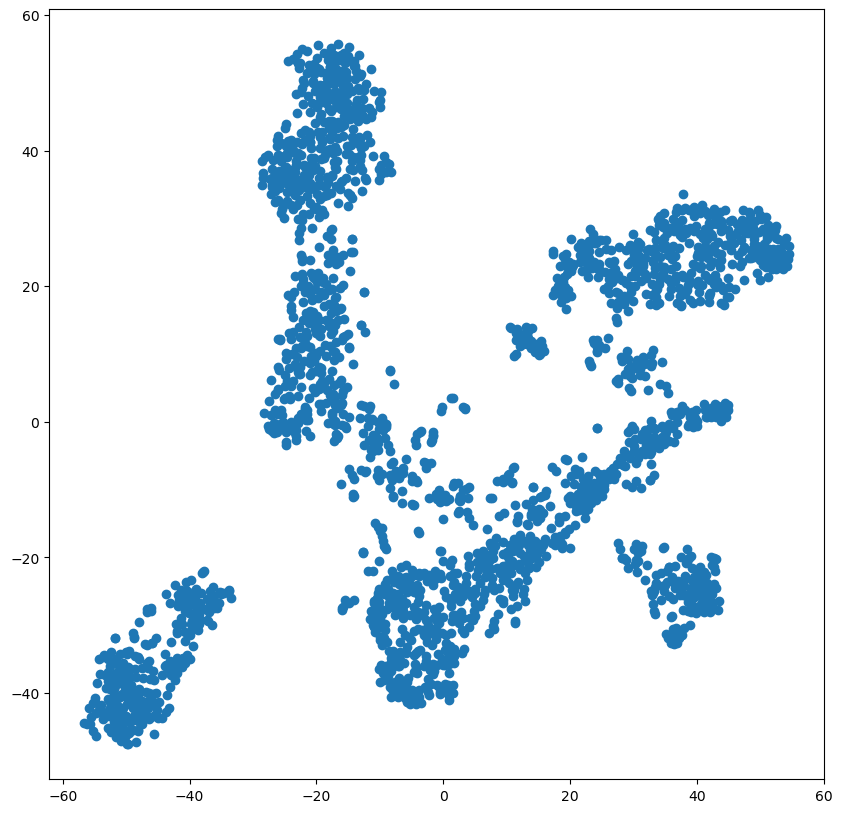

In [3]:
x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
plt.show()

In [ ]:
import numpy as np
np.savetxt("tsne-wambiana.csv", model, delimiter=",", header="1, 2")

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:13

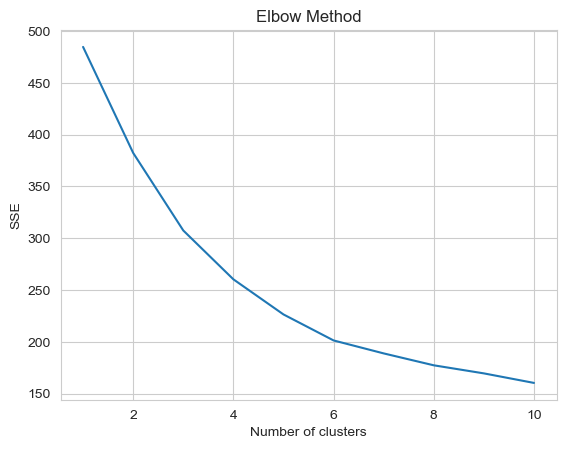

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize an empty list to store SSE values
sse = []

# Fit KMeans algorithm on the dataset for k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(feature_vectors)
    sse.append(kmeans.inertia_)

# Plot SSE against k
sns.set_style("whitegrid")
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_km = km.fit_predict(model)
labels = km.labels_

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [6]:
model[y_km == 0, 0]

array([-22.50332   , -22.135057  , -16.92077   , -19.997248  ,
       -16.550772  , -21.717964  , -12.456494  , -23.404032  ,
       -22.080109  , -20.984268  , -22.170172  , -14.267754  ,
       -14.075957  , -14.216037  , -16.124771  , -23.63176   ,
       -14.878768  , -18.420223  , -22.697775  , -23.694761  ,
       -22.553156  , -23.941267  , -24.067934  , -11.558867  ,
       -15.727148  , -19.592867  , -16.874123  , -14.853983  ,
        -8.117812  , -15.875117  , -21.014736  , -17.057497  ,
       -11.756791  ,  -6.396842  , -18.311989  ,  -8.179677  ,
       -19.65451   , -16.51131   , -23.619665  , -20.103304  ,
       -26.272161  , -26.660086  ,  -6.35309   , -19.329967  ,
       -21.590878  , -18.085363  , -11.502717  , -19.277737  ,
       -24.7354    , -11.329521  , -14.896432  , -19.281433  ,
       -11.824236  , -11.258201  , -11.149879  , -16.179867  ,
       -24.37023   ,  -7.516149  , -22.968443  ,  -3.7204175 ,
       -15.034161  ,  -2.6430686 , -10.148657  ,  -9.69

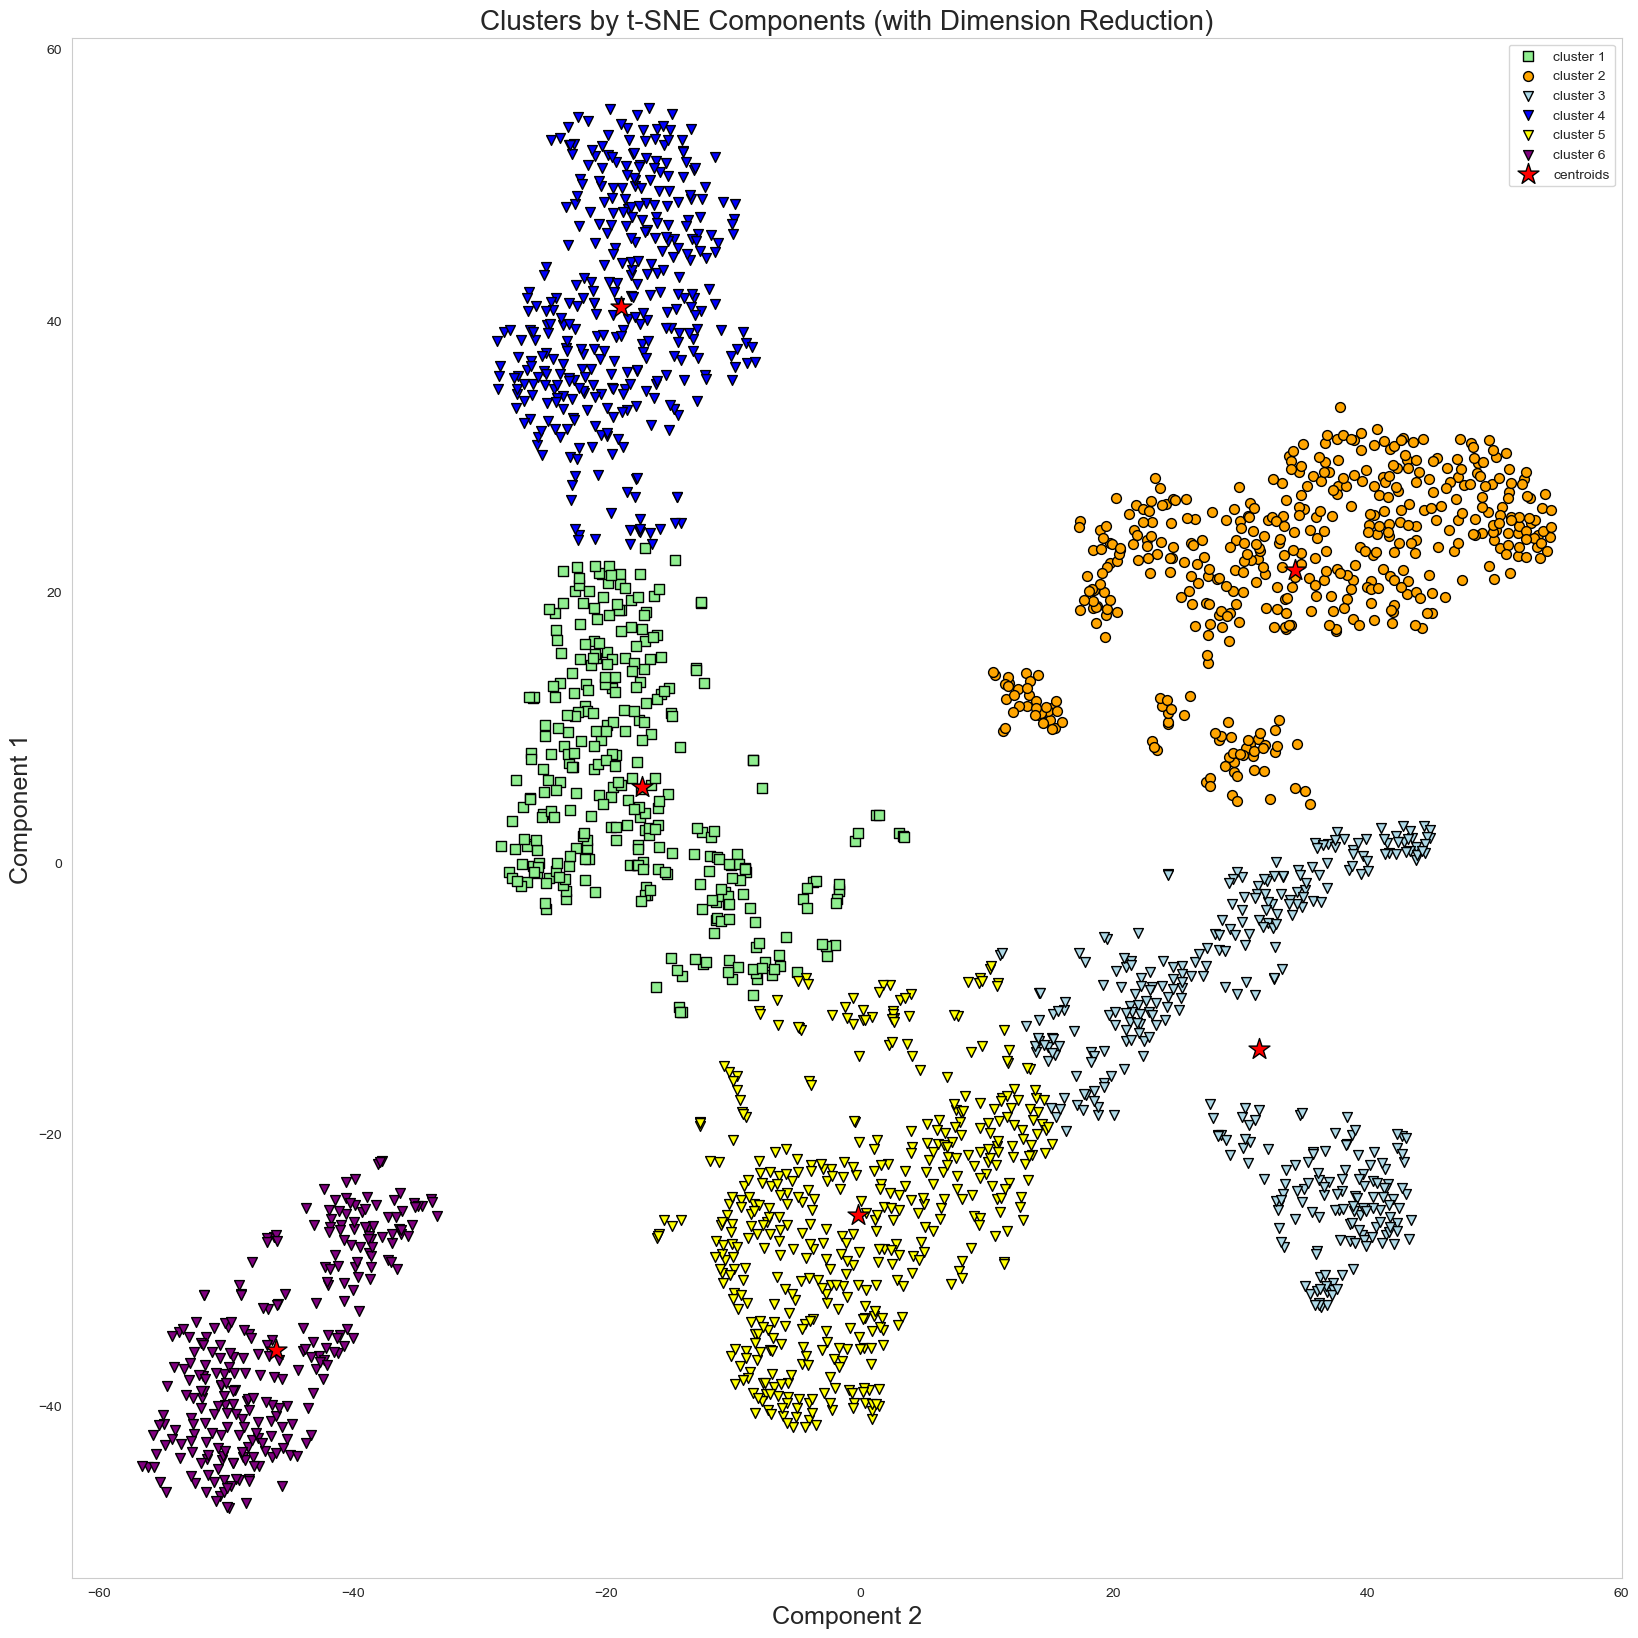

In [7]:
# plot the 3 clusters
plt.figure(figsize=(20, 20))
plt.scatter(
    model[y_km == 0, 0], model[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    model[y_km == 1, 0], model[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    model[y_km == 2, 0], model[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model[y_km == 3, 0], model[y_km == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    model[y_km == 4, 0], model[y_km == 4, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 5'
)

plt.scatter(
    model[y_km == 5, 0], model[y_km == 5, 1],
    s=50, c='purple',
    marker='v', edgecolor='black',
    label='cluster 6'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title('Clusters by t-SNE Components (with Dimension Reduction)', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.grid()
plt.show()

In [8]:
kmeans_data_old = pd.read_csv('kmeans_results.csv')

#encoding class values
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('other', str(0))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('biophony', str(1))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('geophony', str(2))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('anthrophony', str(3))

y_km = kmeans_data_old['class']
# y_km.drop(y_km.tail(1).index, inplace=True)
y_km = y_km.values
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

[Text(0.5, 1.0, 'TSNE Plot with Ground Truth Overlayed'),
 Text(0, 0.5, 'TSNE Component 1'),
 Text(0.5, 0, 'TSNE Component 2')]

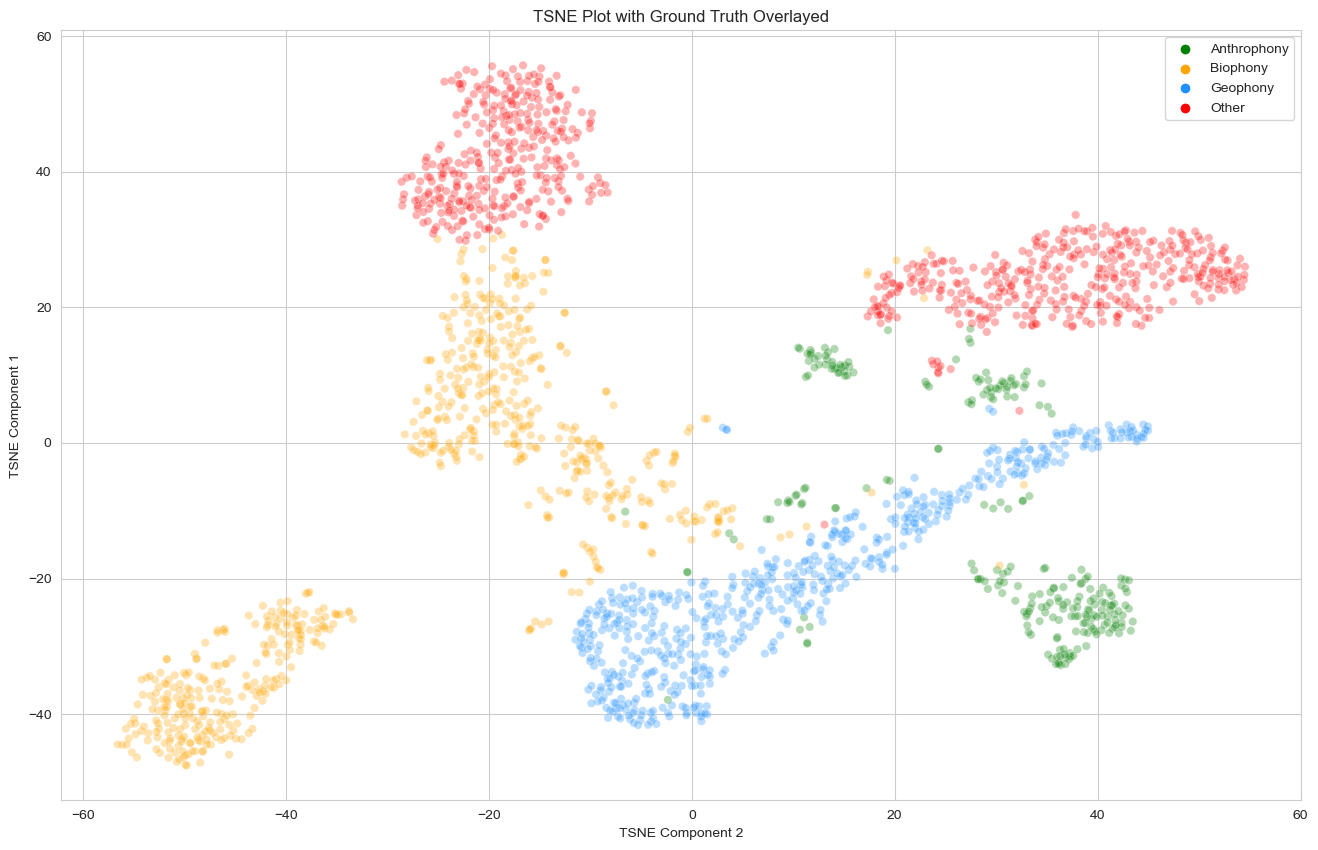

In [9]:
import seaborn as sns

x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize=(16,10))
ax=sns.scatterplot(
    x=x_axis, y=y_axis,
    hue=labels_true,
    legend="full",
    alpha=0.3,
    palette=['green','orange','dodgerblue','red']
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Anthrophony', 'Biophony', 'Geophony', 'Other'])
ax.set(title="TSNE Plot with Ground Truth Overlayed", ylabel="TSNE Component 1", xlabel="TSNE Component 2")

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


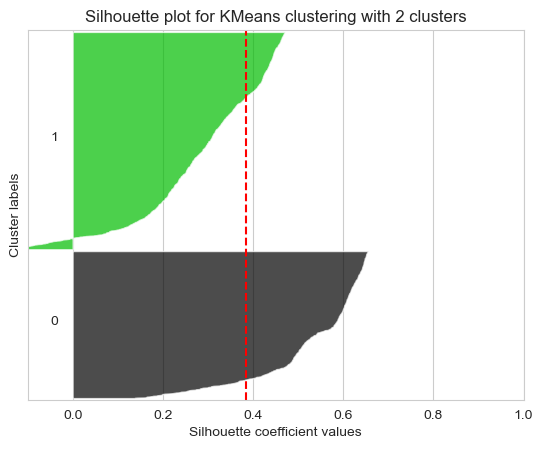

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


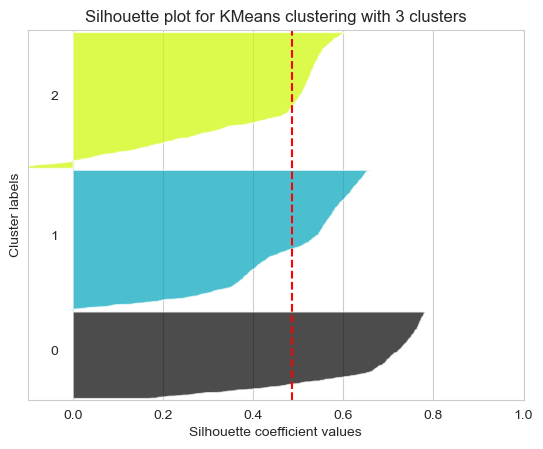

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


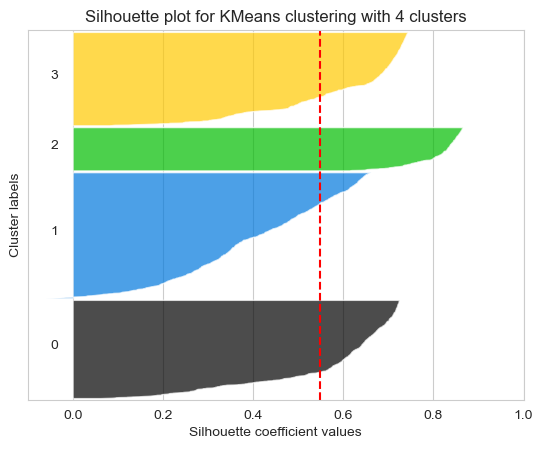

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


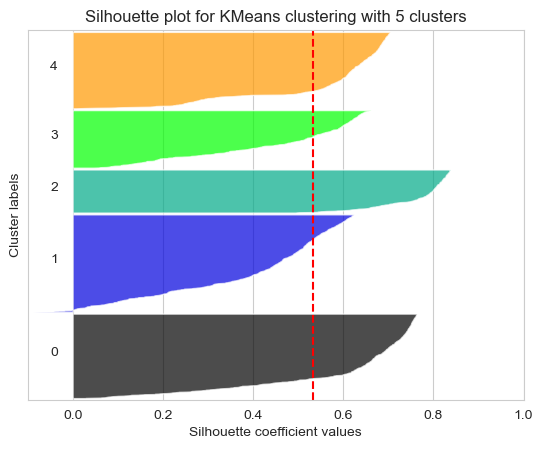

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


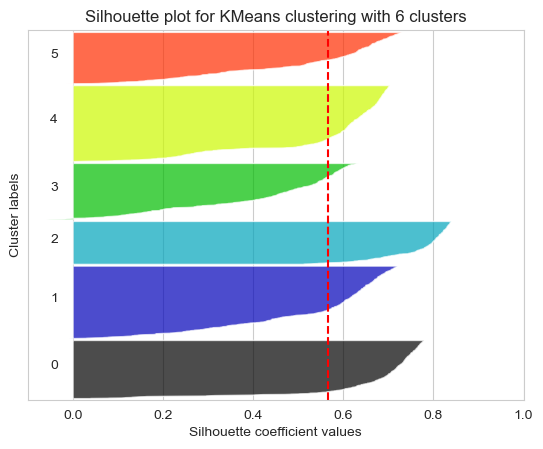

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


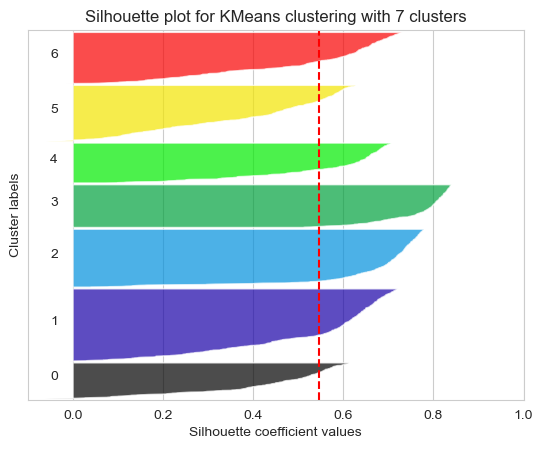

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


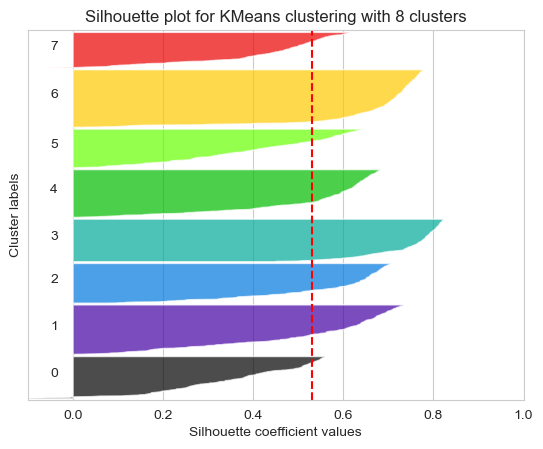

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


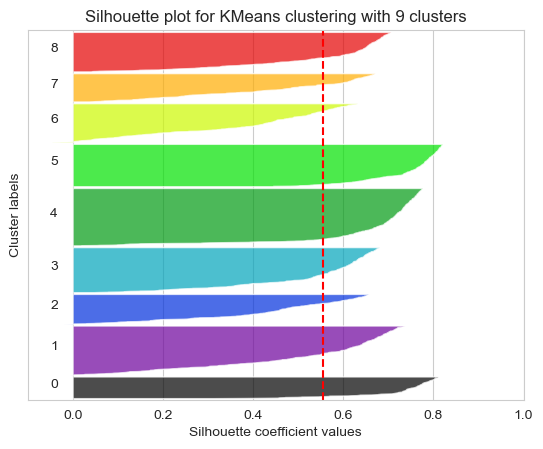

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


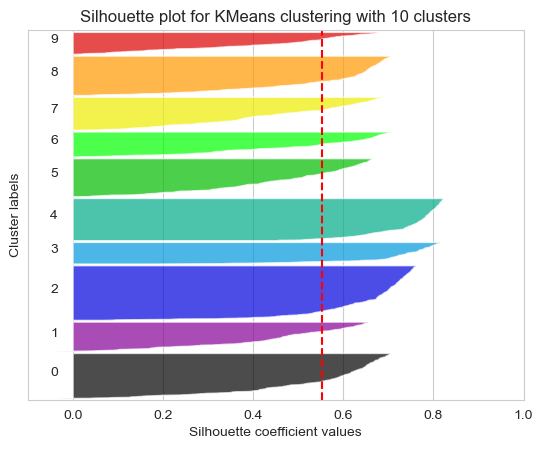

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

X = model
# Define the range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Initialize variables to store best cluster number and best silhouette score
best_n_clusters = None
best_score = -1

# Iterate over different cluster numbers and compute silhouette scores and plots
for n_clusters in range(min_clusters, max_clusters+1):
    # Fit KMeans clustering model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    # Compute silhouette scores and plot
    fig, ax = plt.subplots()
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_scores = silhouette_samples(X, kmeans.labels_)
    y_lower = 10
    for i in range(n_clusters):
        cluster_scores = silhouette_scores[kmeans.labels_ == i]
        cluster_scores.sort()
        size_cluster_i = len(cluster_scores)
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_scores, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax.set_title("Silhouette plot for KMeans clustering with {} clusters".format(n_clusters))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster labels")
    ax.axvline(x=silhouette_score(X, kmeans.labels_, metric='euclidean'), color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()


In [11]:
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

Saving the tsne output as a csv file

In [12]:
import numpy as np

# save the numpy array to a csv file
np.savetxt("tsne.csv", model, delimiter=",", header="1, 2")

In [13]:
kmeans_data_old = pd.read_csv('kmeans_results.csv')

#encoding class values
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('other', str(0))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('biophony', str(1))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('geophony', str(2))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('anthrophony', str(3))

y_km = kmeans_data_old['class']
y_km.drop(y_km.tail(1).index, inplace=True)
y_km = y_km.values
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

In [14]:
from sklearn.cluster import AgglomerativeClustering

single_linkage = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
labels_pred = single_linkage.fit_predict(model)

In [15]:
model[labels_pred == 0, 0]

array([37.26732  , 35.494343 , 36.819008 , 37.30658  , 36.36263  ,
       35.115273 , 37.185684 , 36.828274 , 37.591286 , 36.20249  ,
       36.170364 , 36.278313 , 35.89476  , 36.646404 , 35.99195  ,
       33.06187  , 36.04048  , 33.352196 , 34.29464  , 35.673264 ,
       36.750324 , 36.292786 , 38.002556 , 33.426487 , 38.871994 ,
       33.209373 , 34.27882  , 35.977165 , 35.672913 , 37.86314  ,
       34.68121  , 42.706505 , 38.6409   , 43.07824  , 34.96296  ,
       30.07423  , 33.046455 , 30.652811 , 32.97388  , 32.760933 ,
       39.00982  , 24.272953 , 38.428795 , 30.590553 , 41.010902 ,
       30.180735 , 24.30314  , 42.330547 , 33.22207  , 36.59832  ,
       36.624443 , 29.17237  , 37.985565 , 41.465015 , 28.236788 ,
       41.625378 , 38.59774  , 36.172962 , 38.196404 , 42.306835 ,
       40.42808  , 42.043056 , 33.543617 , 42.878014 , 39.614788 ,
       40.68353  , 28.808468 , 31.174198 , 41.36998  , 29.699703 ,
       31.13335  , 43.072018 , 42.737835 , 30.763504 , 39.2665

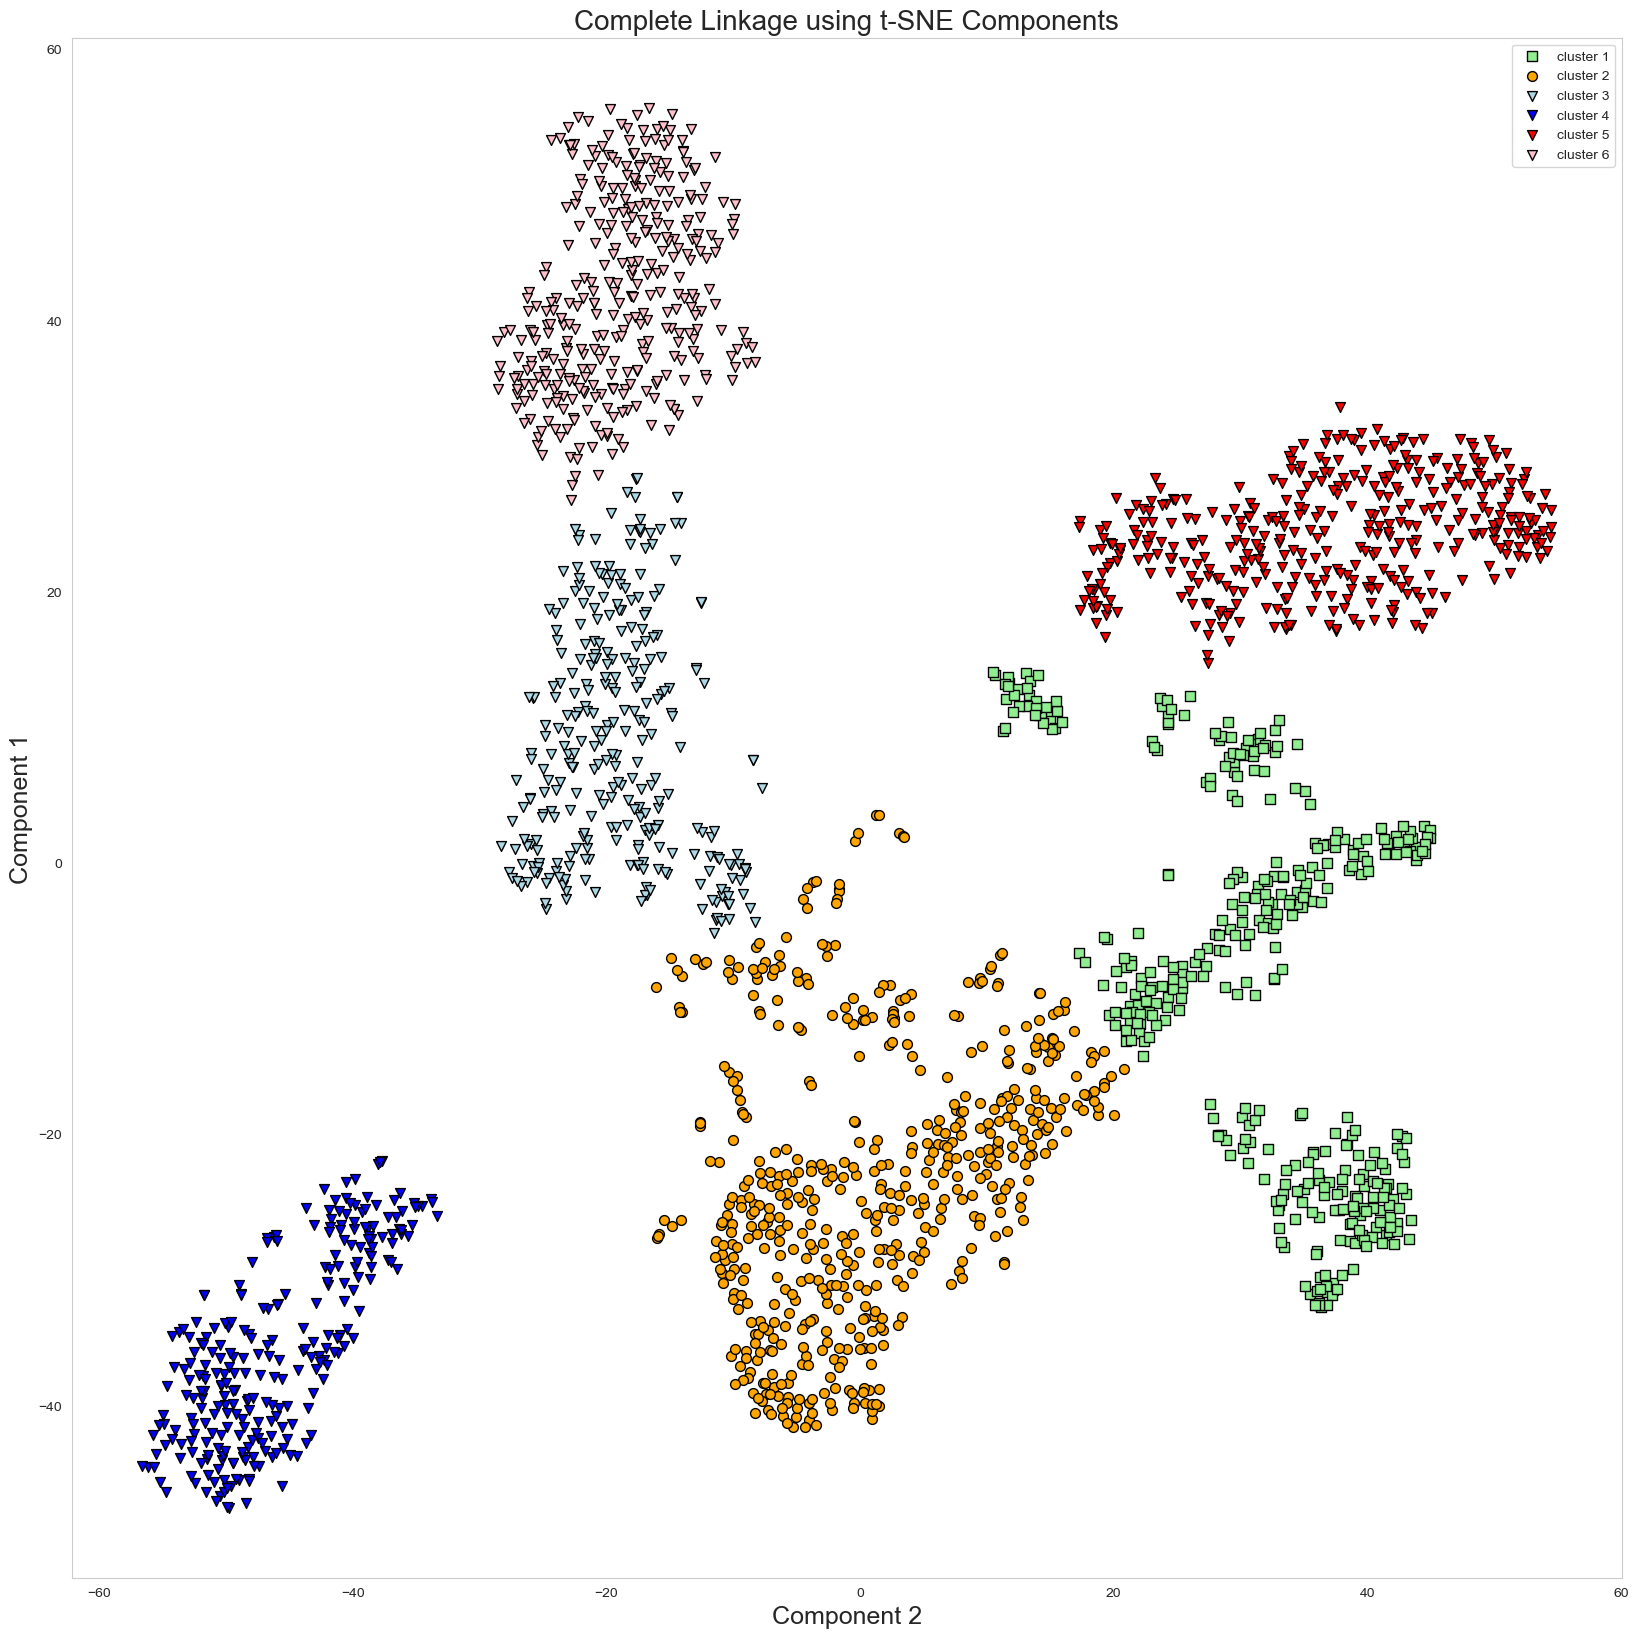

In [16]:
# plot the 3 clusters
plt.figure(figsize=(20, 20))
plt.scatter(
    model[labels_pred == 0, 0], model[labels_pred == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    model[labels_pred == 1, 0], model[labels_pred == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    model[labels_pred == 2, 0], model[labels_pred == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model[labels_pred == 3, 0], model[labels_pred == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    model[labels_pred == 4, 0], model[labels_pred == 4, 1],
    s=50, c='red',
    marker='v', edgecolor='black',
    label='cluster 5'
)

plt.scatter(
    model[labels_pred == 5, 0], model[labels_pred == 5, 1],
    s=50, c='pink',
    marker='v', edgecolor='black',
    label='cluster 6'
)


plt.legend(scatterpoints=1)
plt.title('Complete Linkage using t-SNE Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.grid()
plt.show()

In [17]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn import metrics


# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [18]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [19]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}
X = feature_vectors
y = labels_true

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    print(f"Rand-score for {dist_measure} is {round(metrics.rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Rand-score for {dist_measure} is {round(metrics.adjusted_rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Mutual-score for {dist_measure} is {round(metrics.adjusted_mutual_info_score(y, pyLabels)*100, 2)}%")
    print(f"Homogeneity-score for {dist_measure} is {round(metrics.homogeneity_score(y, pyLabels)*100, 2)}%")
    print(f"Completeness-score for {dist_measure} is {round(metrics.completeness_score(y, pyLabels)*100, 2)}%")
    print(f"V-measure-score for {dist_measure} is {round(metrics.v_measure_score(y, pyLabels)*100, 2)}%")
    print(f"Fowlkes-mallows-score for {dist_measure} is {round(metrics.fowlkes_mallows_score(y, pyLabels)*100, 2)}%")
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")
    print(" ")

Rand-score for 0 is 70.16%
Adj-Rand-score for 0 is 28.28%
Adj-Mutual-score for 0 is 38.1%
Homogeneity-score for 0 is 36.89%
Completeness-score for 0 is 39.6%
V-measure-score for 0 is 38.2%
Fowlkes-mallows-score for 0 is 49.42%
The purity score for euclidean distance is 59.68%
 
Rand-score for 1 is 70.17%
Adj-Rand-score for 1 is 28.35%
Adj-Mutual-score for 1 is 38.12%
Homogeneity-score for 1 is 36.89%
Completeness-score for 1 is 39.64%
V-measure-score for 1 is 38.22%
Fowlkes-mallows-score for 1 is 49.48%
The purity score for squared euclidean distance is 59.54%
 
Rand-score for 2 is 70.67%
Adj-Rand-score for 2 is 29.28%
Adj-Mutual-score for 2 is 38.24%
Homogeneity-score for 2 is 37.12%
Completeness-score for 2 is 39.63%
V-measure-score for 2 is 38.33%
Fowlkes-mallows-score for 2 is 50.0%
The purity score for manhattan distance is 60.3%
 
Rand-score for 3 is 67.84%
Adj-Rand-score for 3 is 22.16%
Adj-Mutual-score for 3 is 28.44%
Homogeneity-score for 3 is 27.81%
Completeness-score for 3 i